# <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 5 - due: 4/23/2020
In this assignment you will develop a Multinomial Logistic Regression model for handwritten digit recognition using MNIST data set. 

Enter your name as a comment in the cell below:

In [ ]:
Matt Erickson

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

The following function can be used to display a random sample of images along with targets and predicted class.

In [3]:
def display_a_random_sample_of_images(grid_size, images, targets, predictions=np.array([]), title="images"):
    """ 
    Displayes a random sample of images with the corresponding targets
    
    
    Argument:
        grid_size -- size of subplot will be grid_sizeXgrid_size.
        images -- an array of images 32x32  (num_images x 8 x 8)
        targets -- an array of class values (num_images x 1) containing class values 
             between 0 and 9  
        predictions -- an array of predicted class values (nume_images X 1) containig predicted
             class values between 0 and 9
    Returns:
        None
    """
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    #reshape the images for display
    
    fig, axes1 = plt.subplots(grid_size,grid_size,figsize=(3,3))
    fig.suptitle(title, fontsize="x-small")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)
    
    for j in range(grid_size):
        for k in range(grid_size):
            i = np.random.choice(range(len(images)))
            axes1[j][k].set_axis_off()
            if predictions.size > 0:
                axes1[j][k].set_title(class_names[targets[i]]+","+class_names[predictions[i]])
            else:
                axes1[j][k].set_title(class_names[targets[i]])
            axes1[j][k].title.set_fontsize(8)
            axes1[j][k].imshow(images[i, :,:], cmap = matplotlib.cm.binary, interpolation="nearest")

Let's first load the data set from keras datasets.  You will need to look at Keras datasets documentation, learn about the MNIST data set and develop the code below.

In [4]:
from keras.datasets import mnist
def load_digits():
    """
    Load and returns images and targets from the sklearn digits dataset.  
    
    Arguments: None
    
    #Returns: 
        images -- an array of digit images (num_imagesX8x8) 
               -- images are in normlaized form
        target_classes -- an array of class values (num_imagesX1) containing 
        class values between 0 and 9

    """    

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    return X_train, y_train, X_test, y_test

Using TensorFlow backend.


Now, let's load the images and display a random sample of 9 images in a 3-by-3 grid along with their corresponding target class using the functions developed above.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


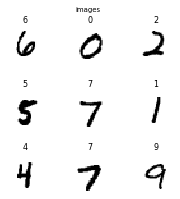

In [5]:
X_train, y_train, X_test, y_test = load_digits()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
np.random.seed(2)
display_a_random_sample_of_images(3, X_train, y_train, title="images")
plt.show()


## Expected output:
<img src="Figure1.png" width="20%" height="20%" align="left"> <br>


Next, we will reshape the train images from 60000 x 28 x 28 to 60000 x 784 and test images from 10000 x 28 x 28 to 10000 x 784.  This way, each image will be represented with a vector of 784 pixel values.  We will also reshape the targets to a rank-2 vector.  

In [6]:

X_train_flat = np.reshape(X_train,(-1,784))
y_train_flat = np.reshape(y_train,(-1,1))
X_test_flat = np.reshape(X_test,(10000,784))
y_test_flat = np.reshape(y_test,(10000,1))

print(X_train_flat.shape, y_train_flat.shape, X_test_flat.shape, y_test_flat.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


## Expected output:
(60000, 784) (60000, 1) (10000, 784) (10000, 1)


Now let's train a Logistic Regression model using the flattened data.  You do not need to normalize the features as pixel values are in the same range (0 to 255). NOTE: Ignore the warning as the data is non-linear and we are using a liner model to fit it.

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax_reg.fit(X_train_flat,y_train_flat)

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now let's evaluate the model on the training and test images.  First we will need to get the h values.

In [ ]:
h_train =softmax_reg.predict(X_train_flat)
h_test = softmax_reg.predict(X_test_flat)

Next, we will measure the model performance on the training set and test set using Confusion Matrix, Average Accuracy, Average Precision, Average Recall and Average F1-Score. 

In [ ]:

cf_train = confusion_matrix(y_train_flat,h_train)
ca_train = np.mean(accuracy_score(np.squeeze(y_train_flat),h_train))
ps_train = np.mean(precision_score(y_train_flat,h_train, average="macro")) 
rs_train = np.mean(recall_score(y_train_flat,h_train,average="macro"))
f1_train = np.mean(f1_score(y_train_flat,h_train,average="macro"))
print("Training Performance")
print("Average Train Confusion Matrix:\n", cf_train)
print("Average Train Accuracy: {0:0.2%}".format(ca_train))
print("Average Train Precision {0:0.2%}".format(ps_train))
print("Average Train Recall: {0:0.2%}".format(rs_train))
print("Average Train F1: {0:0.2%}".format(f1_train))

cf_test = confusion_matrix(y_test_flat,h_test)
ca_test = accuracy_score(np.squeeze(y_test_flat),h_test)
ps_test = precision_score(y_test_flat,h_test,average="macro")
rs_test = recall_score(y_test_flat,h_test,average="macro")
f1_test = f1_score(y_test_flat,h_test,average="macro")
print("Training Performance")
print("Average Test Confusion Matrix:\n", cf_test)
print("Average Test Accuracy: {0:0.2%}".format(ca_test))
print("Average Test Precision {0:0.2%}".format(ps_test))
print("Average Test Recall {0:0.2%}".format(rs_test))
print("Average Test F1: {0:0.2%}".format(f1_test))

## Expected output:
<img src="Figure2.png" width="40%" height="40%" align="left"> <br>


Finally, let's examine a set of images and compare their predicted and actual labels.

In [1]:
np.random.seed(5)
display_a_random_sample_of_images(5, X_test,y_test,h_test,title="Images")

NameError: name 'np' is not defined

## Expected output:
<img src="Figure3.png" width="30%" height="30%" align="left"> <br>


For each misclassified image, provide a once scentence description of why you think it was missclassified

In [ ]:
# I think the 5 was missclassified because the bottom of it curves up kinda like the bottom of a 8 does
# I think the 4 was missclassified becasue the top looks like a 9
# I think the 6 was missclassified because it is scribbled and the top looks like the top of a 5
# I think the 9 was missclassified becasue the ring on top is very small so it looks like a 1
# I think the 8 was missclassified becasue the bottom is faded so it looks like it is a 9 almost
